In [1]:
import requests
import json

# Let's get the data from the Citibike API
url = 'http://www.citibikenyc.com/stations/json'
resp = requests.get(url)
results = json.loads(resp.text)

data = results["stationBeanList"]
data

[{u'altitude': u'',
  u'availableBikes': 5,
  u'availableDocks': 33,
  u'city': u'',
  u'id': 72,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-05-23 03:43:51 PM',
  u'latitude': 40.76727216,
  u'location': u'',
  u'longitude': -73.99392888,
  u'postalCode': u'',
  u'stAddress1': u'W 52 St & 11 Ave',
  u'stAddress2': u'',
  u'stationName': u'W 52 St & 11 Ave',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 39},
 {u'altitude': u'',
  u'availableBikes': 31,
  u'availableDocks': 2,
  u'city': u'',
  u'id': 79,
  u'landMark': u'',
  u'lastCommunicationTime': u'2016-05-23 03:42:31 PM',
  u'latitude': 40.71911552,
  u'location': u'',
  u'longitude': -74.00666661,
  u'postalCode': u'',
  u'stAddress1': u'Franklin St & W Broadway',
  u'stAddress2': u'',
  u'stationName': u'Franklin St & W Broadway',
  u'statusKey': 1,
  u'statusValue': u'In Service',
  u'testStation': False,
  u'totalDocks': 33},
 {u'altitude': u'',
  u'availableBikes': 1

In [2]:
resp = requests.get(url)

# We transform the returned JSON answer from the API into a Python dictionary object
results = json.loads(resp.text)

# We only need a subset of the data in the JSON returned by the Citibike API, so we keep only we need
data = results["stationBeanList"]



In [3]:
import pandas

df = pandas.DataFrame(data)
df

C:\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,5,33,,72,,2016-05-23 03:43:51 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,31,2,,79,,2016-05-23 03:42:31 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,13,14,,82,,2016-05-23 03:44:46 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,28,33,,83,,2016-05-23 03:43:21 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,1,38,,116,,2016-05-23 03:41:51 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39
5,,6,13,,119,,2016-05-23 03:43:52 PM,40.696089,,-73.978034,,Park Ave & St Edwards St,,Park Ave & St Edwards St,1,In Service,False,19
6,,0,19,,120,,2016-05-23 03:42:00 PM,40.686768,,-73.959282,,Lexington Ave & Classon Ave,,Lexington Ave & Classon Ave,1,In Service,False,19
7,,9,20,,127,,2016-05-23 03:45:06 PM,40.731724,,-74.006744,,Barrow St & Hudson St,,Barrow St & Hudson St,1,In Service,False,31
8,,19,7,,128,,2016-05-23 03:44:12 PM,40.727103,,-74.002971,,MacDougal St & Prince St,,MacDougal St & Prince St,1,In Service,False,30
9,,34,12,,137,,2016-05-23 03:45:28 PM,40.761628,,-73.972924,,E 56 St & Madison Ave,,E 56 St & Madison Ave,1,In Service,False,46


In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib as plt

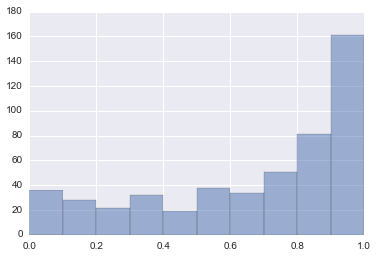

In [5]:
%matplotlib inline
#df["availableBikes"].hist()
(df["availableDocks"]/df['totalDocks']).hist(alpha=0.5)
#df["totalDocks"].hist(alpha=0.5)

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


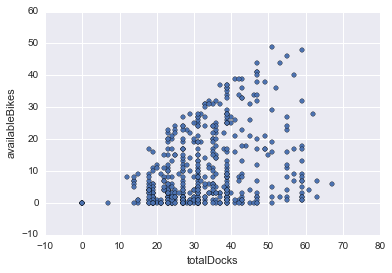

In [6]:
df.plot(kind='scatter', x="totalDocks", y="availableBikes")

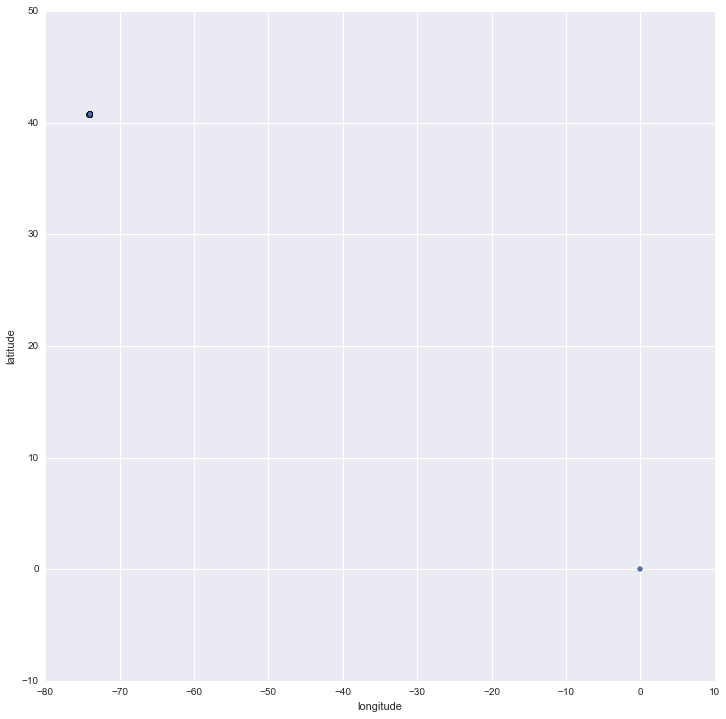

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib as plt

# This defines the size of the image below
plt.rcParams['figure.figsize'] = (12, 12)

# Let's do a first plot. Put the stations on a scatterplot based on
# their longitude and latitude
df.plot(kind='scatter', x='longitude', y='latitude')

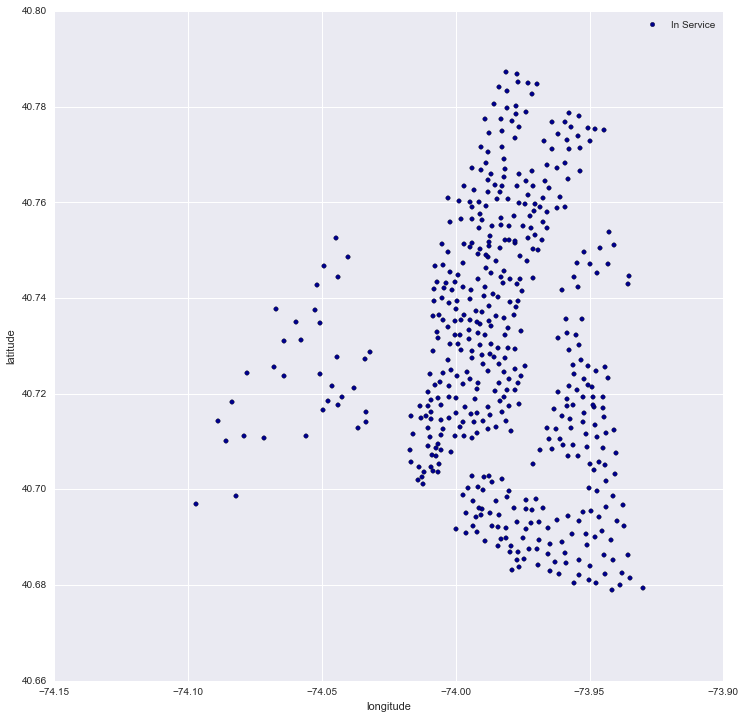

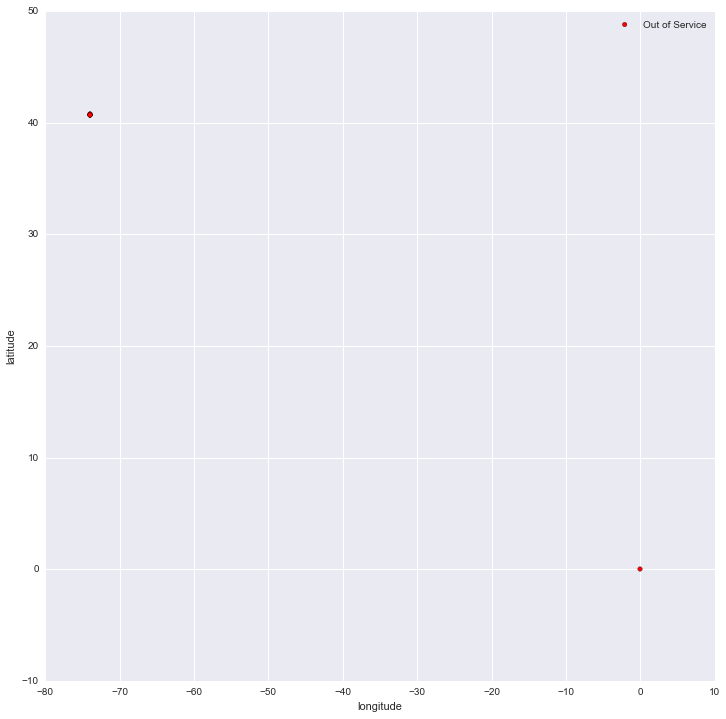

In [8]:
# Lets plot the stations that are out of service in red
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

df[inservice].plot(kind='scatter', 
                   x='longitude', 
                   y='latitude', 
                   color='DarkBlue', 
                   label='In Service')
df[outofservice].plot(kind='scatter', 
                      x='longitude', 
                      y='latitude', 
                      color='Red', 
                      label = 'Out of Service')

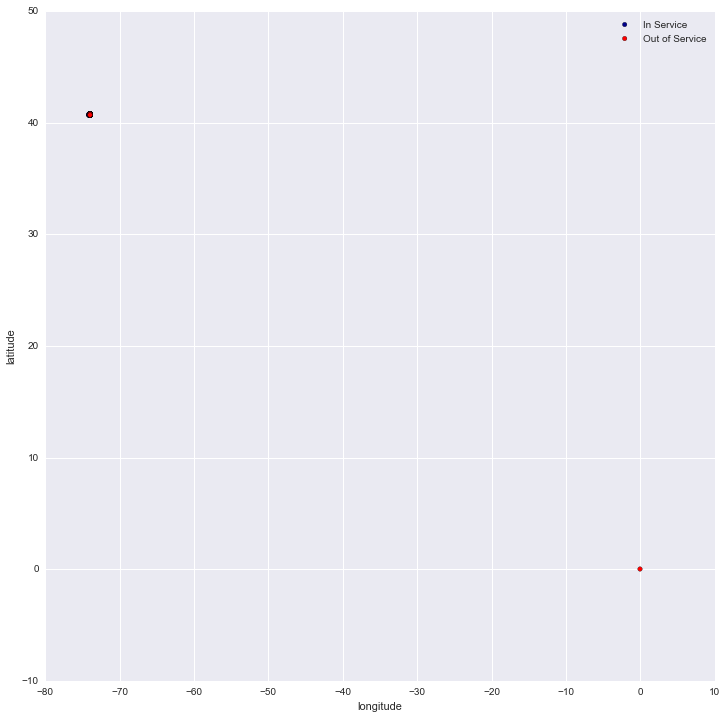

In [9]:
# I do not like having to separate plots for that. There should be a way to merge the two plots
# After checking the online documentation, it seem that we will use the "ax" convention
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

firstplot = df[inservice].plot(kind='scatter', 
                               x='longitude', 
                               y='latitude', 
                               color='DarkBlue', 
                               label='In Service')
secondplot = df[outofservice].plot(kind='scatter', 
                      x='longitude', 
                      y='latitude', 
                      color='Red', 
                      label = 'Out of Service', 
                      ax = firstplot)

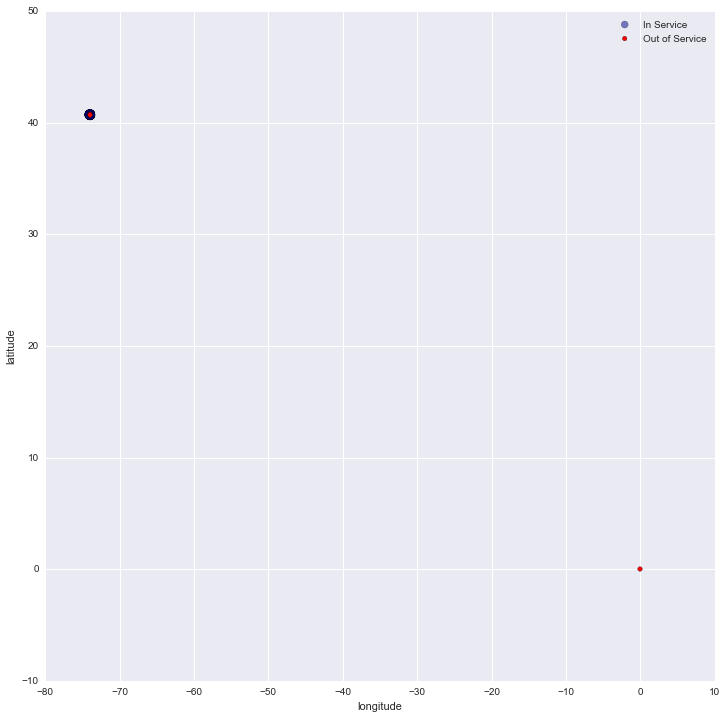

In [10]:
# And now make the size of each point proportional to the size of available bikes
# using the s option in the plot
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

# We also add the "alpha=0.5" to add transparency
firstplot = df[inservice].plot(kind='scatter', 
                               x='longitude', 
                               y='latitude', 
                               color='DarkBlue', 
                               alpha=0.5, 
                               label='In Service', 
                               s=100*(df['availableBikes']/df['totalDocks']))
secondplot = df[outofservice].plot(kind='scatter', 
                                   x='longitude', 
                                   y='latitude', 
                                   color='Red', 
                                   ax = firstplot, 
                                   label = 'Out of Service')

In order to add an underlying map, we will use the GeoPandas library.
In the command window you will need to type: 

`sudo apt-get install python-dev    
sudo apt-get install libgdal1-dev   
sudo apt-get install gdal-bin    
sudo apt-get install python-gdal   
sudo pip install git+git://github.com/geopandas/geopandas.git`

In [11]:
# Get rid of 0,0 coordinates
import numpy as np
df['longitude']=np.where(df.longitude==0, np.nan, df.longitude)
df['latitude']=np.where(df.latitude==0, np.nan, df.latitude)

In [12]:
# Download a geojson borough file to draw the map (we can preload this for them if it's easier)
import urllib
urllib.urlretrieve("http://data.beta.nyc//dataset/68c0332f-c3bb-4a78-a0c1-32af515892d6/resource/7c164faa-4458-4ff2-9ef0-09db00b509ef/download/42c737fd496f4d6683bba25fb0e86e1dnycboroughboundaries.geojson",
                   "boroughs.json")

('boroughs.json', <httplib.HTTPMessage instance at 0x000000000F7BE108>)

In [13]:
import geopandas
from geopandas.plotting import plot_dataframe

basemap = geopandas.read_file('boroughs.json')

(40.6, 40.9)

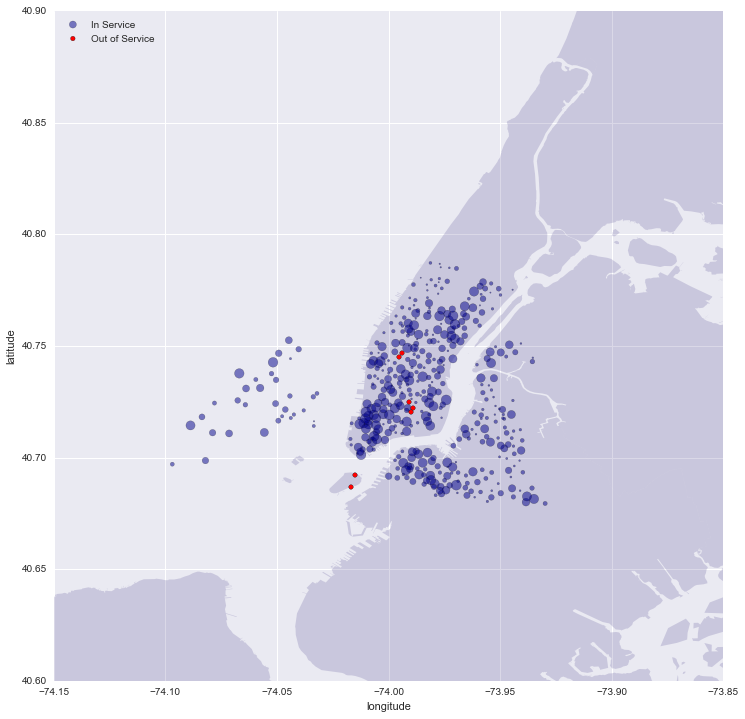

In [14]:
firstplot = df[inservice].plot(kind='scatter', 
                               x='longitude', 
                               y='latitude', 
                               color='DarkBlue', 
                               alpha=0.5, 
                               label='In Service', 
                               s=100*(df['availableBikes']/df['totalDocks']),
                               zorder=2)
secondplot = df[outofservice].plot(kind='scatter', 
                                   x='longitude', 
                                   y='latitude', 
                                   color='Red', 
                                   ax = firstplot, 
                                   label = 'Out of Service',
                                   zorder=3)

thirdplot = basemap.plot(figsize=[10,10],
                         color='darkslateblue',
                         alpha=0.2,
                         ax = firstplot ,
                         edgecolor='none'
                        )
firstplot.set_xlim([-74.15, -73.85])
firstplot.set_ylim([40.6, 40.9])